In [24]:
import numpy as np
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install psycopg2-binary

In [25]:
conn = ps.connect(dbname="Northwind",
                  user="postgres",
                  password="140803",
                  port = "5432")

In [ ]:
# Aylık bazda siparişlerin dağılımını analiz edelim

In [26]:
sql="""select to_char(order_date,'YYYY-MM') as order_month,count(o.order_id) as order_count
from orders as o 
left join order_details as od on o.order_id=od.order_id
group by 1 order by 2 desc"""


In [36]:
df = sqlio.read_sql_query(sql,conn)
df.head(5)

C:\Users\ahu\AppData\Local\Temp\ipykernel_33624\1992327037.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql,conn)


,order_month,order_count
0,1998-04,180
1,1998-03,166
2,1997-12,156
3,1998-01,129
4,1997-10,106


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_month  23 non-null     object
 1   order_count  23 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 500.0+ bytes


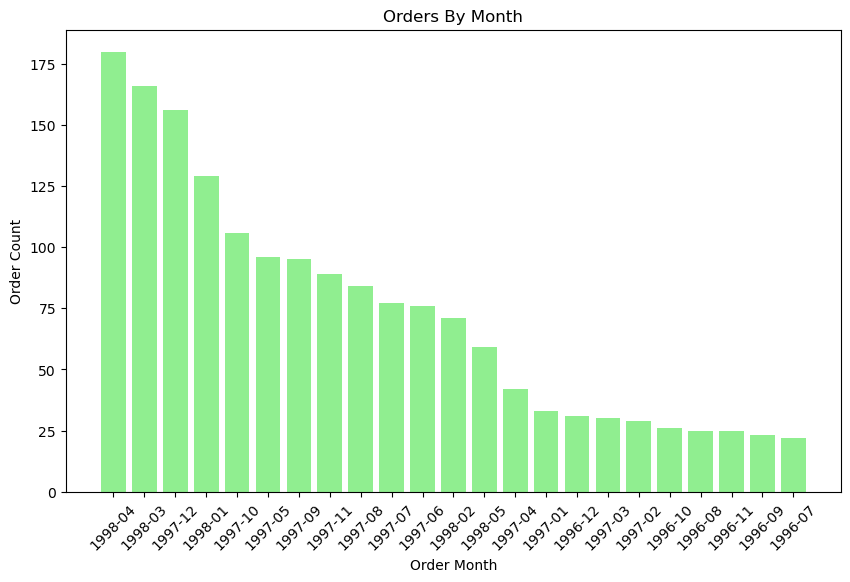

In [32]:
plt.figure(figsize=(10, 6))
bars = plt.bar(df['order_month'], df['order_count'], color='lightgreen')
plt.xlabel('Order Month')
plt.ylabel('Order Count')
plt.title('Orders By Month')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Siparişlerin kategori bazında dağılımını ve her kategoride alınan sipariş adetlerini analiz edelim.

In [1]:
sql1="""select count(distinct o.order_id) as order_count,c.category_name 
from orders as o
left join order_details as od on o.order_id=od.order_id
left join products as p on od.product_id=p.product_id
left join categories as c on p.category_id=c.category_id
where c.category_name is not null
group by 2 order by 1 desc"""

In [7]:
df1 = sqlio.read_sql_query(sql1,conn)
df1

C:\Users\ahu\AppData\Local\Temp\ipykernel_33624\3844948395.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = sqlio.read_sql_query(sql1,conn)


,order_count,category_name
0,216,Beverages
1,189,Dairy Products
2,184,Seafood
3,163,Confections
4,118,Condiments
5,112,Grains/Cereals
6,82,Meat/Poultry
7,78,Produce


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_count    8 non-null      int64 
 1   category_name  8 non-null      object
dtypes: int64(1), object(1)
memory usage: 260.0+ bytes


In [10]:
df1.shape

(8, 2)

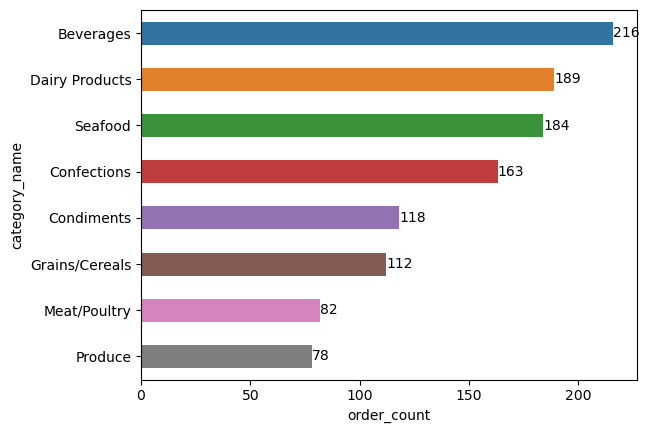

In [34]:
ax=sns.barplot(x = "order_count", y = "category_name", data = df1,linewidth = 2.5, width = 0.50)
for i in ax.containers:
    ax.bar_label(i,)